In [126]:
import pandas as panda
import matplotlib.pyplot as plt
import numpy as np
import random
# import seaborn as sns
# import csv

In [127]:
contests = pd.read_csv('data/Contests.csv')
contests.head()

,ContestId,SportName,VariantName,GameSet,ContestName,ContestStartDatetimeEST,ContestEndDatetimeEST,ContestPayoutDatetimeEST,EntryFeeAmount,TotalPrizeAmount,MaxNumberPlayers,MaxEntriesPerUser,Entries,DistinctUsers,Contest_Group,NumGames,DraftablePlayersInSet,PaidUsersInDraftGroup,TopPrize,MaxPayoutPosition
0,7963004,NFL,Classic,(Main),NFL $25K Quarter Arcade [Just $0.25!],2015-09-13 13:00:00.000,2015-09-14 22:20:00.000,2015-09-15 02:27:24.000,0.25,25000.0,117500,100,117500.0,38925,Headliner,15,910.0,668396,2000.0,23665
1,7963437,NFL,Classic,(Main),"NFL GIANT $2 Booster [Top 1,250 Win $20]",2015-09-13 13:00:00.000,2015-09-14 22:20:00.000,2015-09-15 02:27:24.000,2.00,25000.0,14375,100,14375.0,9663,Booster,15,910.0,668396,20.0,1250
2,8296224,NFL,Classic,(Main),Beginner NFL $5K Spy [Single Entry],2015-09-13 13:00:00.000,2015-09-14 22:20:00.000,2015-09-15 02:27:24.000,100.00,5000.0,55,1,55.0,55,SingleEntry,15,910.0,668396,1100.0,11
3,8296543,NFL,Classic,(Main),NFL $50 Double Up [$5K Gtd] (Multi-Entry),2015-09-13 13:00:00.000,2015-09-14 22:20:00.000,2015-09-15 02:27:24.000,50.00,5000.0,111,11,111.0,79,FeaturedDoubleUp,15,910.0,668396,100.0,50
4,8296544,NFL,Classic,(Main),NFL $50 Double Up [$5K Gtd] (Multi-Entry),2015-09-13 13:00:00.000,2015-09-14 22:20:00.000,2015-09-15 02:27:24.000,50.00,5000.0,111,11,111.0,91,FeaturedDoubleUp,15,910.0,668396,100.0,50


In [259]:
timeDF = pd.read_csv('data/WPI/2017-09.csv', header=None)
timeDF.columns = ['ContestId', 'MinutesRemaining', 'Entries']
targetIDs = timeDF.ContestId.unique()[:1]


### Limiter

In [135]:
#timeDF = timeDF[timeDF['ContestID'].isin(lessIds)]
#timeDF = timeDF.pivot(index="ContestID", columns="MinutesRemaining", values="Entries")

In [261]:
def getContestData(id):
    return contests.loc[contests['ContestId'] == id]

In [268]:
for id in targetIDs:
    contestDF = timeDF.loc[timeDF['ContestId']==id]


,ContestId,MinutesRemaining,Entries
0,43229169,178,2
1,43229169,179,1
2,43229169,205,6
3,43229169,206,4
4,43229169,207,8


In [245]:
# timeData = pd.DataFrame({'ContestID':[], 'MinutesRemaining':[], 'Entries':[]})
timeData = pd.DataFrame(columns=['ContestID', 'MinutesRemaining', 'Entries'])
count = 0
##Making object of single contest's data
for id in targetIDs:
    contest = getContestData(id)
    targetEntries = contest.TopPrize/contest.EntryFeeAmount
    cTimeDF = timeDF.loc[timeDF['ContestId'] == id]
    minutes = []
    entries = []
    entrySum=0
    for index, row in cTimeDF.iterrows():
        minutes.append(row['MinutesRemaining'])
        entrySum = entrySum+row['Entries']
        percentToGoal = float(entrySum/targetEntries*100)
#         print(percentToGoal)
        entries.append(percentToGoal)
    d = {'ContestID':id, 'MinutesRemaining':minutes, 'Entries':entries}
    cData = pd.DataFrame(data=d)
    timeData = pd.concat([timeData, cData])
    count=count+1

AttributeError: 'AxesSubplot' object has no attribute 'line'

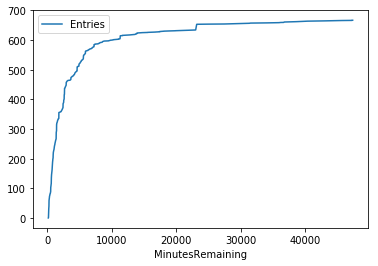

In [255]:
myPlot = timeData.plot(x='MinutesRemaining', y='Entries', kind='line').line(100, 0)
# myPlot
